## Off-axis paraboloid
A source, an off-axis paraboloid and a detector create a popularly used imaging system. The spot diagram shows on-axis field rays converging to a single point, and the Mueller matrix is slightly deviated from the identity matrix as the system has no symmetry.

In [1]:
# %matplotlib inline
# %matplotlib tk
# %matplotlib qt5
import numpy as np
import sys
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd
import copy as cp
from datetime import datetime as dt
#
import PyAstroPol as pap
pap.roundOffDisplay(5)

In [2]:
S = pap.Source(10000, Clear=45)                                             # Source for ray analysis
S.rotateAboutX(180.0)                                                   # 
S.translateOrigin(z=20000.0)                                            # Adjust source position
#
Sd = pap.Source(20, Clear=100.0)                                            # Source for ray display
Sd.rotateAboutX(180.0)                                                  # 
Sd.translateOrigin(z=500.0)                                             # Adjust source position
#
M1 = pap.Surface(100.0, R=1000.0, K=-1.0, Mirror=True, n2=1.1+6.8j, 
             OffAxis=True, OffAxDist=100, OffAxAz=0.0)
#
D = pap.Detector(20)                                                        # Detector
D.translateOrigin(x=-100.0, z=495)                                      # Adjust detector position

In [3]:
Sys = pap.System(S, [M1], D, dRays=Sd)                          # Complete optical system
Sys.propagateRays()                                         # Propagate rays through system

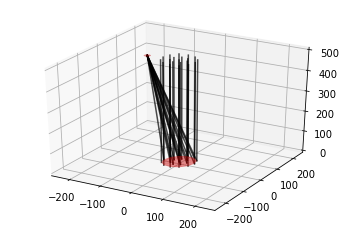

In [4]:
Fig = plt.figure()                                             
Ax = Fig.add_subplot(111, projection='3d')
Sys.draw(Ax)                                                # Draw optical system
pap.adjustAspect(Ax, 500, z=250)                                # Adjust 3D space
plt.show()

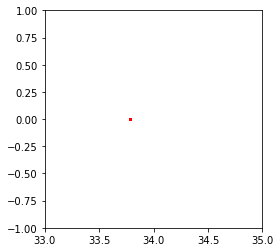

In [5]:
Fig = plt.figure()
Ax = Fig.add_subplot(111, aspect='equal')
Ax.set_xlim([33,35])                       
Ax.set_ylim([-1,1])
Sys.drawSpotDiagram(Ax, s=1.0, color='r')                   # Draw spot diagram
plt.show()

In [6]:
MM, Tra = Sys.getSystemMuellerMatrix()                          # Optical system's Mueller matrix
print('System Mueller matrix is : \n', MM)
print('Throughput is: ', Tra)

System Mueller matrix is : 
 [[ 1.00000 -0.00049  0.00000  0.00000]
 [-0.00049  1.00000  0.00000  0.00000]
 [-0.00000  0.00000 -1.00000  0.00300]
 [ 0.00000  0.00000 -0.00300 -1.00000]]
Throughput is:  0.866949458514975
